In [5]:
import mido
import pandas as pd
import os

# from sklearn.metrics import mean_absolute_error

import numpy as np

import matplotlib.pyplot as plt


from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [6]:
%load_ext autoreload
%autoreload 2
# from utils.utils import plot_and_save_experiment_results, почему то отказывается импортироваться, пришлось переместить в ноутбук
from utils.utils import AudioFile
from utils.models import ProximityEstimator, ConstantDependenciesRetrieval

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# TODO
- прогнозирование отдельных инструментов
- прогнозирование всей композиции

дополнить иллюстрацией отчет, по тому как формируется матрица
а лучше просто примером

размер маски в модели 3, попробовать 4, 8, 16, 32
попробовать в 3ем реализовать все через многомерный тензор

сузить X в коде до только тех значений которые мы встречаем
сузить матрицу частот до только тех комбинаций что мы встречаем


добавить график для других alpha для экспоненциального сглаживания, чтобы показать что плоская линия дает наилучшее предсказание

In [12]:
track = AudioFile('1_simple', 'gusi')
notes = np.array(track.extract_notes())
model = SimpleExpSmoothing(notes)
model_fit = model.fit()

pred_notes_exp = model_fit.fittedvalues

model = ProximityEstimator(3)
model.fit(notes)

pred_notes_prox = model.predict()

model = ConstantDependenciesRetrieval([1,1], 0.01)
model.fit(notes)

pred_notes_depend = model.predict()

In [10]:
def plot_and_save_experiment_results(notes, pred_notes_exp,pred_notes_prox,pred_notes_depend, dataset_name) -> None:
    path = f'results/{dataset_name}'
    os.makedirs(path, exist_ok=True)
    plt.figure(figsize=(18,10))
    indices = np.arange(0, len(notes))
    plt.plot(indices, notes, marker='.', label='Ground  truth')
    plt.plot(indices, pred_notes_exp, marker='.', label = 'ExponentialSmoothing')
    plt.plot(indices, pred_notes_prox, marker='.', label='ProximityEstimator')
    plt.plot(indices, pred_notes_depend, marker='.', label='Dependency retrieval')

    plt.grid(True)

    plt.legend()

    plt.ylabel('Note')
    plt.title(f'Data {dataset_name}')

    plt.savefig(f'{path}/{dataset_name}_all_ts.png')

    plt.show()

    not_nan_ind = np.where(~np.isnan(pred_notes_depend))[0]

    print('Exponential smoothing: ', mean_absolute_error(notes[5:], pred_notes_exp[5:]))
    print('Proximity Estimator: ', mean_absolute_error(notes[5:], pred_notes_prox[5:]))


    print('Exponential smoothing without nans: ', mean_absolute_error(notes[not_nan_ind], pred_notes_exp[not_nan_ind]))
    print('Proximity Estimator without nans: ', mean_absolute_error(notes[not_nan_ind], pred_notes_prox[not_nan_ind]))
    print('Dependency retrieval without nans: ', mean_absolute_error(notes[not_nan_ind], pred_notes_depend[not_nan_ind]))

    def tmp_func(indices, notes, pred_notes, dataset_name, estimator_name):
        plt.plot(indices, notes, marker='.')
        plt.plot(indices, pred_notes, marker='.')

        plt.ylabel("Note")
        plt.grid(True)

        plt.title(f"{estimator_name} estimation")

        plt.savefig(f"{path}/{dataset_name}_{estimator_name}.png")
        plt.show()

    tmp_func(indices, notes, pred_notes_exp, dataset_name, 'Exponential_smoothing')
    tmp_func(indices, notes, pred_notes_prox, dataset_name, 'Proximity')
    tmp_func(indices, notes, pred_notes_depend, dataset_name, 'Dependency_retrieval')

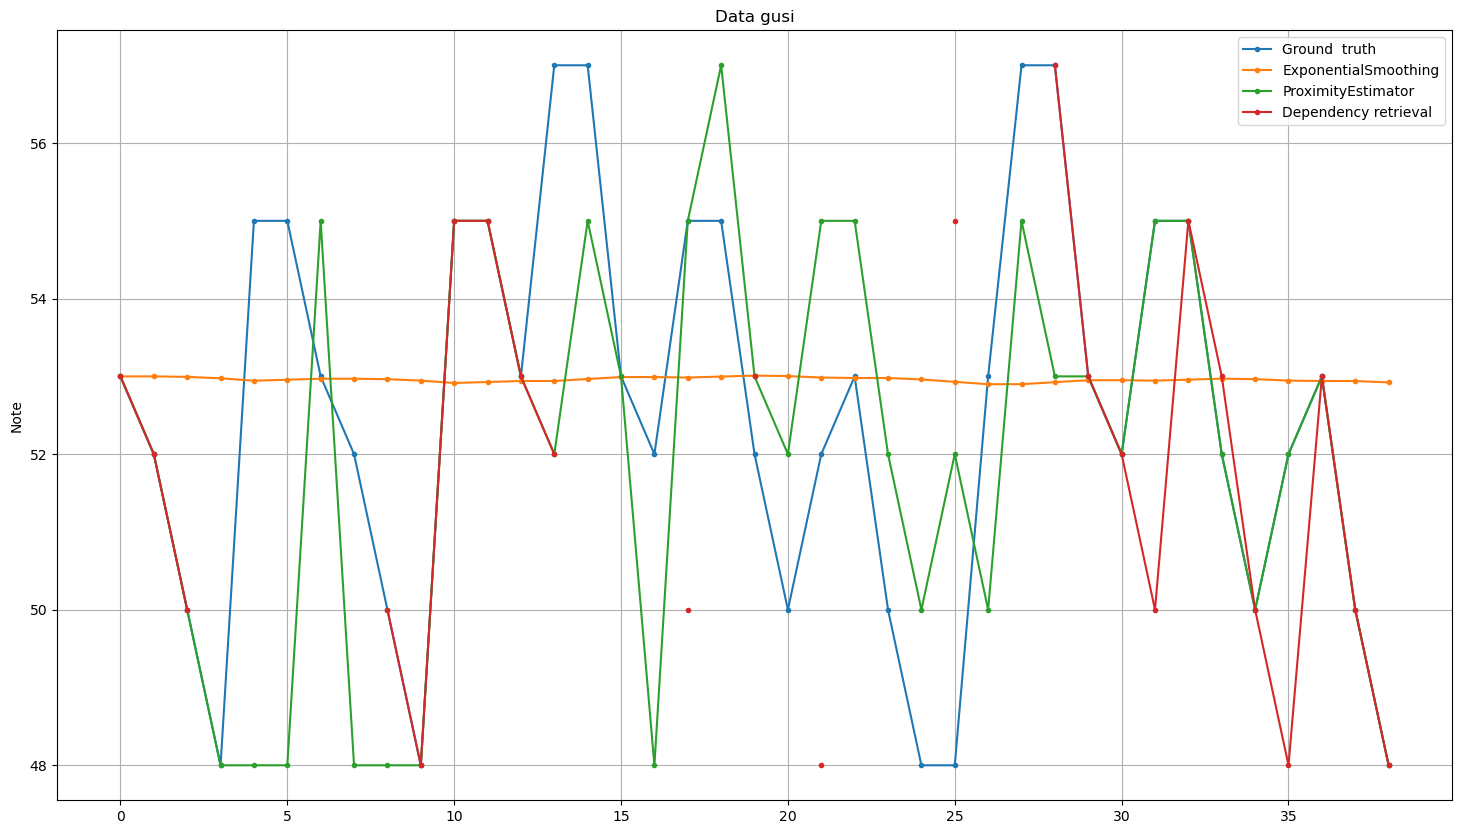

Exponential smoothing:  2.127796381831997
Proximity Estimator:  1.5588235294117647
Exponential smoothing without nans:  2.1289410789485212
Proximity Estimator without nans:  0.7916666666666666
Dependency retrieval without nans:  1.3333333333333333


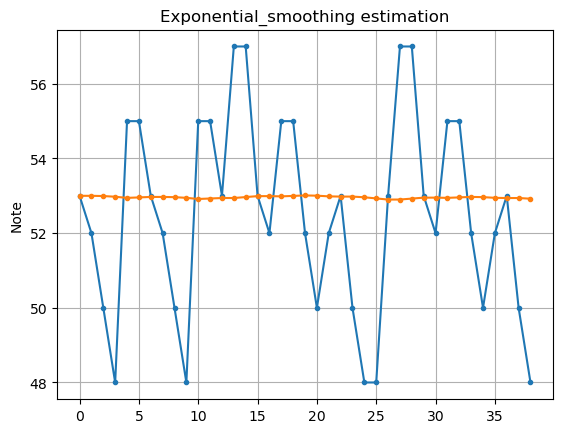

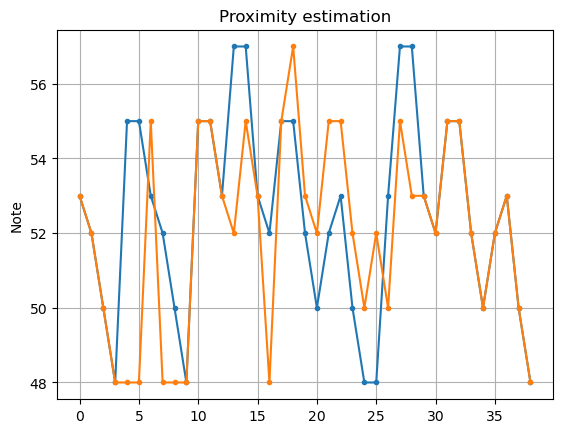

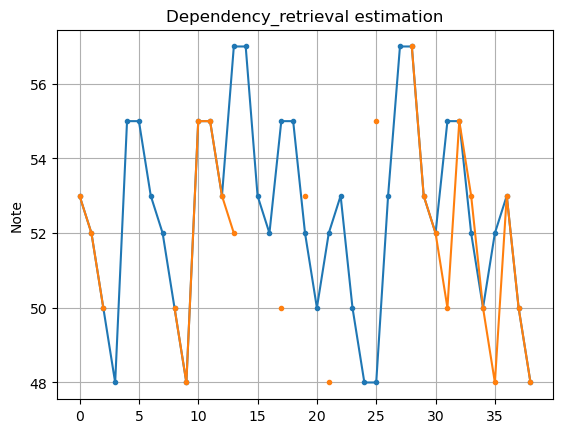

In [13]:
plot_and_save_experiment_results(notes, pred_notes_exp, pred_notes_prox, pred_notes_depend, 'gusi')

In [14]:
track = AudioFile('1_simple', 'gamma')
notes = np.array(track.extract_notes())
model = SimpleExpSmoothing(notes)
model_fit = model.fit()

pred_notes_exp = model_fit.fittedvalues

model = ProximityEstimator(3)
model.fit(notes)

pred_notes_prox = model.predict()

model = ConstantDependenciesRetrieval([1,1], 0.01)
model.fit(notes)

pred_notes_depend = model.predict()

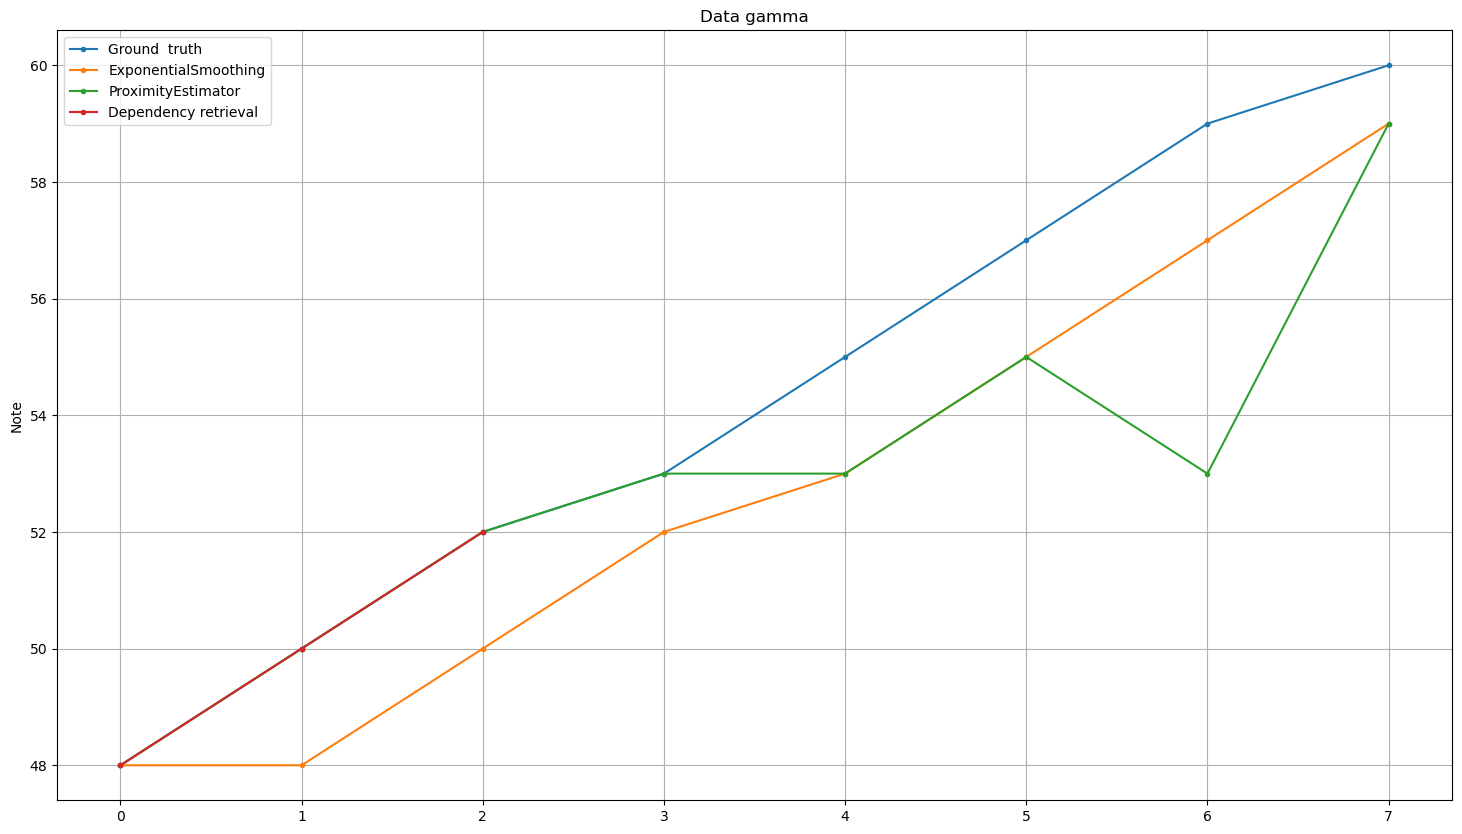

Exponential smoothing:  1.6666666964689891
Proximity Estimator:  3.0
Exponential smoothing without nans:  1.3333333432674408
Proximity Estimator without nans:  0.0
Dependency retrieval without nans:  0.0


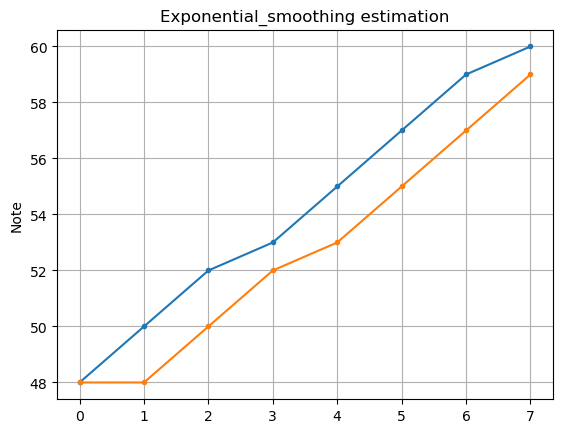

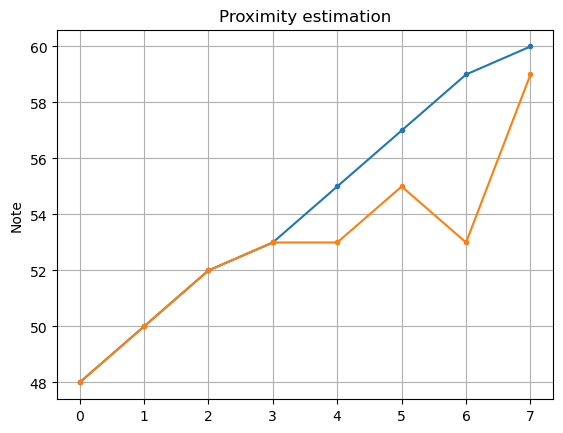

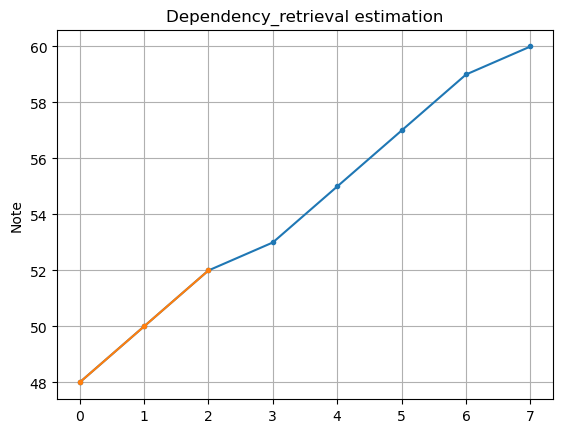

In [15]:
plot_and_save_experiment_results(notes, pred_notes_exp, pred_notes_prox, pred_notes_depend, 'gamma')